In [257]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage
from scipy import interpolate
import matplotlib.mlab as ml
import matplotlib.tri as tri
import matplotlib
import pandas as pd
from sklearn import preprocessing

In [258]:
data=pd.read_csv("fes.dat",header=None,sep="\s+",skiprows=9,usecols=[i for i in range(3)])
data.columns = ["s(R)","z(R)", f"$\Delta$G"]
data

,s(R),z(R),$\Delta$G
0,1.336852,-0.016966,220.129489
1,2.043065,-0.016966,220.129339
2,2.749278,-0.016966,220.129388
3,3.455491,-0.016966,220.129620
4,4.161705,-0.016966,220.129959
...,...,...,...
7590,79.020302,0.079521,220.129387
7591,79.726515,0.079521,220.129658
7592,80.432729,0.079521,220.129981
7593,81.138942,0.079521,220.130305


In [259]:
data=data[(data["s(R)"]>1.2) & (data["s(R)"]<83.0) & (data["z(R)"]>0.0) & (data["z(R)"]<0.07)]
data

,s(R),z(R),$\Delta$G
1360,1.336852,0.000577,209.477485
1361,2.043065,0.000577,207.072958
1362,2.749278,0.000577,205.735048
1363,3.455491,0.000577,205.740285
1364,4.161705,0.000577,206.936466
...,...,...,...
6775,79.726515,0.068996,213.832140
6776,80.432729,0.068996,215.084257
6777,81.138942,0.068996,216.351980
6778,81.845155,0.068996,217.485099


<ipython-input-260-3b95ca01dc1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Normalized s(R)"] = (data["s(R)"]-data["s(R)"].min())/(data["s(R)"].max()-data["s(R)"].min())


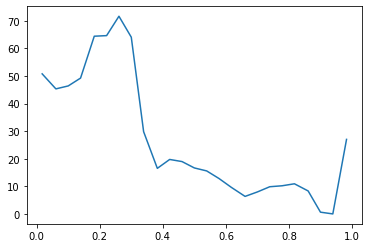

In [260]:
data["Normalized s(R)"] = (data["s(R)"]-data["s(R)"].min())/(data["s(R)"].max()-data["s(R)"].min())
bins=pd.cut(data["Normalized s(R)"],bins=25)
grp=data.groupby(bins)
g=grp["$\Delta$G"].min()
s=grp["Normalized s(R)"].mean()
plt.plot(s,g)

In [261]:
g

Normalized s(R)
(-0.001, 0.04]    50.765878
(0.04, 0.08]      45.322034
(0.08, 0.12]      46.390436
(0.12, 0.16]      49.235103
(0.16, 0.2]       64.411023
(0.2, 0.24]       64.625278
(0.24, 0.28]      71.649549
(0.28, 0.32]      64.052826
(0.32, 0.36]      29.806442
(0.36, 0.4]       16.519039
(0.4, 0.44]       19.740374
(0.44, 0.48]      18.973468
(0.48, 0.52]      16.666462
(0.52, 0.56]      15.583782
(0.56, 0.6]       12.824765
(0.6, 0.64]        9.618389
(0.64, 0.68]       6.348591
(0.68, 0.72]       7.969076
(0.72, 0.76]       9.852298
(0.76, 0.8]       10.199402
(0.8, 0.84]       10.919264
(0.84, 0.88]       8.320979
(0.88, 0.92]       0.632919
(0.92, 0.96]       0.000000
(0.96, 1.0]       27.013130
Name: $\Delta$G, dtype: float64

In [262]:
[data[data["$\Delta$G"]==i]['z(R)'] for i in g]

[5308    0.051452
 Name: z(R), dtype: float64,
 5312    0.051452
 Name: z(R), dtype: float64,
 5314    0.051452
 Name: z(R), dtype: float64,
 5182    0.049698
 Name: z(R), dtype: float64,
 5327    0.051452
 Name: z(R), dtype: float64,
 5328    0.051452
 Name: z(R), dtype: float64,
 5332    0.051452
 Name: z(R), dtype: float64,
 5340    0.051452
 Name: z(R), dtype: float64,
 5345    0.051452
 Name: z(R), dtype: float64,
 5348    0.051452
 Name: z(R), dtype: float64,
 5215    0.049698
 Name: z(R), dtype: float64,
 5223    0.049698
 Name: z(R), dtype: float64,
 5226    0.049698
 Name: z(R), dtype: float64,
 5368    0.051452
 Name: z(R), dtype: float64,
 5372    0.051452
 Name: z(R), dtype: float64,
 5241    0.049698
 Name: z(R), dtype: float64,
 5244    0.049698
 Name: z(R), dtype: float64,
 5247    0.049698
 Name: z(R), dtype: float64,
 5251    0.049698
 Name: z(R), dtype: float64,
 5258    0.049698
 Name: z(R), dtype: float64,
 5260    0.049698
 Name: z(R), dtype: float64,
 5269    0.04

In [263]:
x = data["Normalized s(R)"]
y = data["z(R)"]
z = data[f"$\Delta$G"]
x1 = data["Normalized s(R)"]
data

,s(R),z(R),$\Delta$G,Normalized s(R)
1360,1.336852,0.000577,209.477485,0.000000
1361,2.043065,0.000577,207.072958,0.008696
1362,2.749278,0.000577,205.735048,0.017391
1363,3.455491,0.000577,205.740285,0.026087
1364,4.161705,0.000577,206.936466,0.034783
...,...,...,...,...
6775,79.726515,0.068996,213.832140,0.965217
6776,80.432729,0.068996,215.084257,0.973913
6777,81.138942,0.068996,216.351980,0.982609
6778,81.845155,0.068996,217.485099,0.991304


In [264]:
breaks = np.linspace(0, 30, 11)

In [265]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

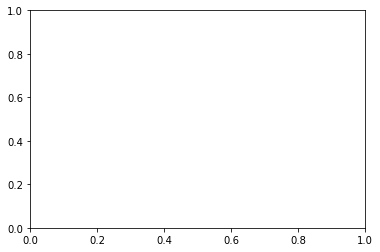

In [266]:
fig, ax = plt.subplots()

In [267]:
ax.set_ylim([0.5,6.5])
CS = ax.tricontour(x, y, z, breaks, linewidths=1.0, colors='k')
manual_locations = [(0.17, 3.98), (0.275,4.0),(0.45, 4.16),(0.54,4.20),(0.66,4.2),(0.89,4.05)]
ax.clabel(CS, fontsize=15, inline=True,inline_spacing=2,manual=manual_locations,colors='w', fmt='%1.1f',rightside_up=True)
image = ax.tricontourf(x, y, z, breaks, cmap='seismic',vmin=0.0, vmax=30.0)
fig.colorbar(mappable=image,ticks=breaks, orientation='vertical',ax=ax)

In [268]:
ax.set_xlabel('Normalized s(R)')
ax.set_ylabel('z(R)')

Text(3.200000000000003, 0.5, 'z(R)')

In [270]:
plt

<module 'matplotlib.pyplot' from '/home/baoraa/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [271]:
ax

<AxesSubplot:xlabel='Normalized s(R)', ylabel='z(R)'>